In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [2]:
address = 'Kings Cross, London N1C 4AG, UK' #Expected result is around: 51.533, -0.125).

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5320529 -0.1206259


In [54]:
CLIENT_ID = 'x'
CLIENT_SECRET = 'z'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: x
CLIENT_SECRET:z


In [4]:
search_query = 'Indian Restaurant'
radius = 3000
LIMIT = 50
print('Search parameters are set. Ready for takeoff')

Search parameters are set. Ready for takeoff


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=4UNXSJJIKPTSR31CYKJPZC3NIFGDCYLIA4Q0GPXNVO5DZ0QL&client_secret=45SLNQLNVKDOWNALHC5POOBGLYXR1N0R1WLWKUHJBIUSFVU1&ll=51.5320529,-0.1206259&v=20180605&query=Indian Restaurant&radius=3000&limit=50'

In [7]:
results = requests.get(url).json()

In [9]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4f36e716e4b0fc67a8b07d36,96 Tooley St,GB,London,United Kingdom,NaN,4026,"[96 Tooley St, Southwark, Greater London, SE1 ...","[{'label': 'display', 'lat': 51.50459129552639...",51.504591,-0.082787,NaN,SE1 2TH,Greater London,Shad Indian Restaurant,v-1557727505,NaN
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4c30eba666e40f47ab42c48b,10 Chapel Market,GB,Islington,United Kingdom,NaN,741,"[10 Chapel Market, Islington, Greater London, ...","[{'label': 'display', 'lat': 51.53343826646581...",51.533438,-0.110157,NaN,N1 9EZ,Greater London,Spices Indian Restaurant,v-1557727505,NaN
2,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,59832ed68496ca5052ea37bc,149 Strand,GB,London,United Kingdom,NaN,2292,"[149 Strand, London, Greater London, WC2R 1JA,...","[{'label': 'display', 'lat': 51.51150689149121...",51.511507,-0.118414,NaN,WC2R 1JA,Greater London,Shapur Indian Restaurant,v-1557727505,NaN
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4cba0995bac9370427e1e87c,73 Brick Ln,GB,London,United Kingdom,NaN,3630,"[73 Brick Ln, London, Greater London, E1 6RL, ...","[{'label': 'display', 'lat': 51.52010321626370...",51.520103,-0.071858,NaN,E1 6RL,Greater London,Muhib Indian Restaurant,v-1557727505,NaN
4,[],False,4fa0f779e4b0e1be2a541350,201 Holloway Road London N7 8DJ,GB,NaN,United Kingdom,NaN,2286,"[201 Holloway Road London N7 8DJ, United Kingdom]","[{'label': 'display', 'lat': 51.55128744649438...",51.551287,-0.109028,NaN,NaN,NaN,Pritiraj Indian Restaurant,v-1557727505,NaN


In [10]:
dataframe.shape

(50, 19)

In [12]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Shad Indian Restaurant,Indian Restaurant,96 Tooley St,GB,London,United Kingdom,NaN,4026,"[96 Tooley St, Southwark, Greater London, SE1 ...","[{'label': 'display', 'lat': 51.50459129552639...",51.504591,-0.082787,NaN,SE1 2TH,Greater London,4f36e716e4b0fc67a8b07d36
1,Spices Indian Restaurant,Indian Restaurant,10 Chapel Market,GB,Islington,United Kingdom,NaN,741,"[10 Chapel Market, Islington, Greater London, ...","[{'label': 'display', 'lat': 51.53343826646581...",51.533438,-0.110157,NaN,N1 9EZ,Greater London,4c30eba666e40f47ab42c48b
2,Shapur Indian Restaurant,Indian Restaurant,149 Strand,GB,London,United Kingdom,NaN,2292,"[149 Strand, London, Greater London, WC2R 1JA,...","[{'label': 'display', 'lat': 51.51150689149121...",51.511507,-0.118414,NaN,WC2R 1JA,Greater London,59832ed68496ca5052ea37bc
3,Muhib Indian Restaurant,Indian Restaurant,73 Brick Ln,GB,London,United Kingdom,NaN,3630,"[73 Brick Ln, London, Greater London, E1 6RL, ...","[{'label': 'display', 'lat': 51.52010321626370...",51.520103,-0.071858,NaN,E1 6RL,Greater London,4cba0995bac9370427e1e87c
4,Pritiraj Indian Restaurant,None,201 Holloway Road London N7 8DJ,GB,NaN,United Kingdom,NaN,2286,"[201 Holloway Road London N7 8DJ, United Kingdom]","[{'label': 'display', 'lat': 51.55128744649438...",51.551287,-0.109028,NaN,NaN,NaN,4fa0f779e4b0e1be2a541350


In [13]:
dataframe_filtered2 = dataframe_filtered.drop(['address', 'cc', 'city', 'crossStreet', 'formattedAddress', 'neighborhood', 'state'], axis=1)
# dataframe_filtered2.categories.unique()
dataframe_filtered2.drop(dataframe_filtered2.index[dataframe_filtered2['categories'] != 'Indian Restaurant' ], inplace = True)
dataframe_filtered2

,name,categories,country,distance,labeledLatLngs,lat,lng,postalCode,id
0,Shad Indian Restaurant,Indian Restaurant,United Kingdom,4026,"[{'label': 'display', 'lat': 51.50459129552639...",51.504591,-0.082787,SE1 2TH,4f36e716e4b0fc67a8b07d36
1,Spices Indian Restaurant,Indian Restaurant,United Kingdom,741,"[{'label': 'display', 'lat': 51.53343826646581...",51.533438,-0.110157,N1 9EZ,4c30eba666e40f47ab42c48b
2,Shapur Indian Restaurant,Indian Restaurant,United Kingdom,2292,"[{'label': 'display', 'lat': 51.51150689149121...",51.511507,-0.118414,WC2R 1JA,59832ed68496ca5052ea37bc
3,Muhib Indian Restaurant,Indian Restaurant,United Kingdom,3630,"[{'label': 'display', 'lat': 51.52010321626370...",51.520103,-0.071858,E1 6RL,4cba0995bac9370427e1e87c
5,Shahmoon Indian Restaurant,Indian Restaurant,United Kingdom,3503,"[{'label': 'display', 'lat': 51.52430598778552...",51.524306,-0.071589,NaN,4fc95064e4b0257376a84a98
9,Dishoom,Indian Restaurant,United Kingdom,2227,"[{'label': 'display', 'lat': 51.51243, 'lng': ...",51.512430,-0.126908,WC2H 9FB,4c31c371a0ced13a150d146e
10,Indian Lounge,Indian Restaurant,United Kingdom,193,"[{'label': 'display', 'lat': 51.53063237437664...",51.530632,-0.122233,WC1 X8PX,4ffdd5a3e4b0346120e15f40
19,Masala Zone,Indian Restaurant,United Kingdom,2098,"[{'label': 'display', 'lat': 51.51325264866744...",51.513253,-0.122922,WC2E 9DA,4b0e79d1f964a520d25723e3
22,The Rajdoot,Indian Restaurant,United Kingdom,2617,"[{'label': 'display', 'lat': 51.52066960916184...",51.520670,-0.153699,W1U 4HW,4c2b8ef98abca593405f0020
25,Indian City,Indian Restaurant,United Kingdom,2318,"[{'label': 'display', 'lat': 51.51386014235741...",51.513860,-0.104331,EC4V 6AA,4fd9d0f6e4b053a8d3d22f90


In [14]:
dataframe_filtered2.shape

(14, 9)

In [15]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Center point',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [16]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

In [20]:
lng = dataframe_filtered2['lng']
lat = dataframe_filtered2['lat']

In [17]:
colors_map = np.array(['b', 'r'])
def assign_members(lng, lat, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(lng) - centers[0][0]) + np.square(np.array(lat) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(lng) - centers[1][0]) + np.square(np.array(lat) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [18]:
# update means
def update_centers(lng, lat, class_of_points):
    center1 = [np.mean(np.array(lng)[~class_of_points]), np.mean(np.array(lat)[~class_of_points])]
    center2 = [np.mean(np.array(lng)[class_of_points]), np.mean(np.array(lat)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


In [19]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(20, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(lng, lat, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-0.06, -0.15, 2, endpoint=True)
    yticks = np.linspace(51.51, 51.53, 2, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=4, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('lng', fontsize=20)
    ax.set_ylabel('lat', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


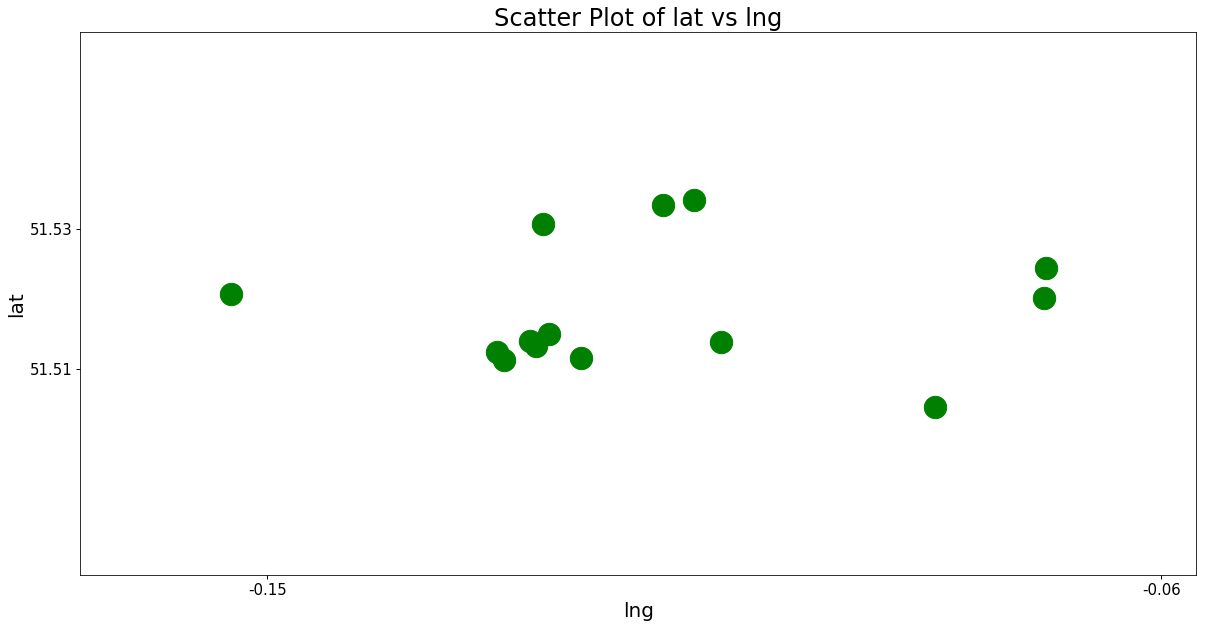

In [21]:
plot_points(figure_title='Scatter Plot of lat vs lng')

In [213]:
# Neste steg: Ta ut plot av dataen, kommentere denne. Videre, gå gjennom kluster analyse. Kommentere cluster mot nord, som er nærmest, og kritikk av 3km griden i analysen.

In [22]:
dataframe_filtered2.columns[5:7]

# Index(['a1_count', 'a1_mean', 'a1_std'], dtype='object')

X = dataframe_filtered2.as_matrix(columns=dataframe_filtered2.columns[5:7])

X

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([[51.5045913 , -0.08278741],
       [51.53343827, -0.11015667],
       [51.51150689, -0.11841416],
       [51.52010322, -0.0718582 ],
       [51.52430599, -0.07158856],
       [51.51243   , -0.12690805],
       [51.53063237, -0.12223255],
       [51.51325265, -0.12292208],
       [51.52066961, -0.15369876],
       [51.51386014, -0.10433148],
       [51.51497005, -0.12168861],
       [51.51391987, -0.12360165],
       [51.5340241 , -0.10700785],
       [51.51122625, -0.12615173]])

In [47]:
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

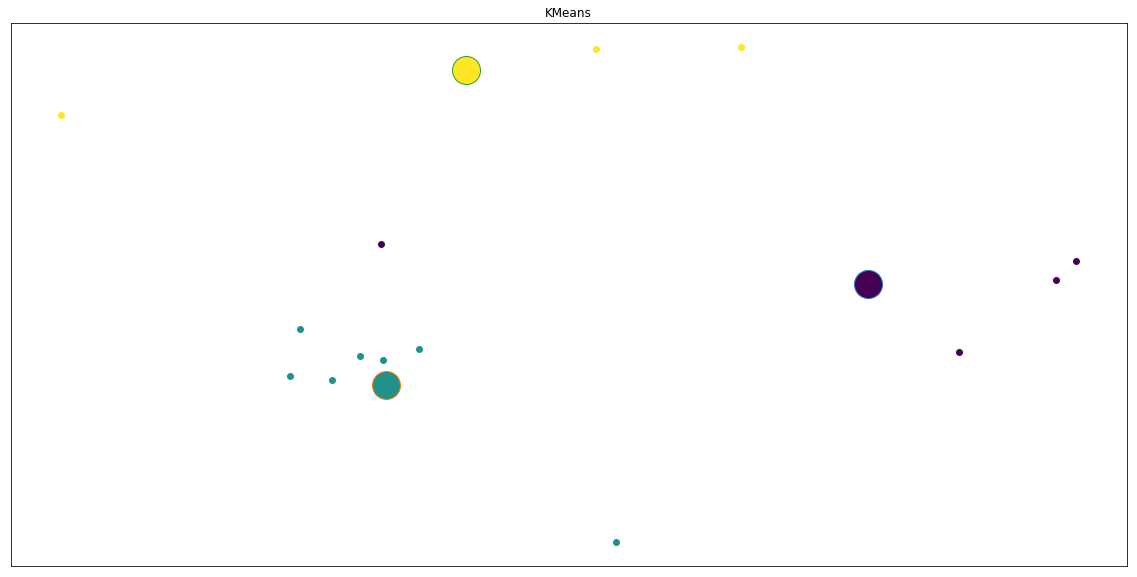

In [48]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(20, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.viridis(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',  markersize=16)
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markersize=28)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

In [53]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# Circle marker to highlight the starting point of analysis
folium.features.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='red',
    popup='Center point',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Circle marker to highlight the main cluster of interest in the analysis
folium.features.CircleMarker(
    [51.5330529, -0.1131],
    radius=10,
    color='green',
    popup='Center point',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map